In [27]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
data = pd.read_csv('./data/data2.csv')
data.head()

,SYMBOL,HINDLEVER,JSWSTL,WIPRO
0,Date,NaN,NaN,NaN
1,2000-01-03,2307.55,390.15,2724.20
2,2000-01-04,2281.05,369.20,2942.15
3,2000-01-05,2199.90,378.85,2990.10
4,2000-01-06,2288.20,368.05,2932.25


In [29]:
stocks = data.loc[:,data.columns!="SYMBOL"].pct_change()
date = data.loc[:,data.columns=="SYMBOL"]
stocks = date.join(stocks)
stocks.head()

,SYMBOL,HINDLEVER,JSWSTL,WIPRO
0,Date,NaN,NaN,NaN
1,2000-01-03,NaN,NaN,NaN
2,2000-01-04,-0.011484,-0.053697,0.080005
3,2000-01-05,-0.035576,0.026138,0.016298
4,2000-01-06,0.040138,-0.028507,-0.019347


In [30]:
# arithmetic mean daily return
# stocks.mean()

In [31]:
data2 = data.loc[:,data.columns!="SYMBOL"]
log_return = np.log(data2/data2.shift(1))
log_return.head()

,HINDLEVER,JSWSTL,WIPRO
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,-0.011550,-0.055193,0.076966
3,-0.036224,0.025802,0.016166
4,0.039354,-0.028922,-0.019537


# Randomly Generate weights for the assets and Find Sharpe Ratio

In [32]:
print(stocks.columns)

weights = np.array(np.random.random(3))
print('Random Weights:')
print(weights)


print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean() * weights) * 252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['SYMBOL', 'HINDLEVER', 'JSWSTL', 'WIPRO'], dtype='object')
Random Weights:
[0.31091636 0.1694851  0.24406152]
Rebalance
[0.42916805 0.23394583 0.33688612]
Expected Portfolio Return
-0.01795734866353468
Expected Volatility
0.3692050779563113
Sharpe Ratio
-0.04863787021276995


# Fix min-weights and find Sharpe Ratio

In [33]:
print(stocks.columns)

# weights = np.array(np.random.random(3))
weights = X = np.array([0.2, 0.6, 0.2])
print('Random Weights:')
print(weights)


# print('Rebalance')
# weights = weights/np.sum(weights)
# print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean() * weights) * 252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['SYMBOL', 'HINDLEVER', 'JSWSTL', 'WIPRO'], dtype='object')
Random Weights:
[0.2 0.6 0.2]
Expected Portfolio Return
0.00703138278131156
Expected Volatility
0.4784156266020729
Sharpe Ratio
0.014697226408032832


# Run Monte Carlo Simulation and find the max possible Sharpie Ratio
### (No Condition on weights distribution)

In [34]:
num_ports = 20000
all_weights = np.zeros((num_ports, (len(stocks.columns)-1)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(3)) 
    weights = weights/np.sum(weights)
	
    # save the weights
    all_weights[ind,:] = weights
	
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [35]:
sharpe_arr.max()

0.05137667308459804

In [36]:
# sharpe_arr.argmax()
all_weights[sharpe_arr.argmax(),:]

array([0.08184184, 0.91719812, 0.00096005])

Text(0, 0.5, 'Return')

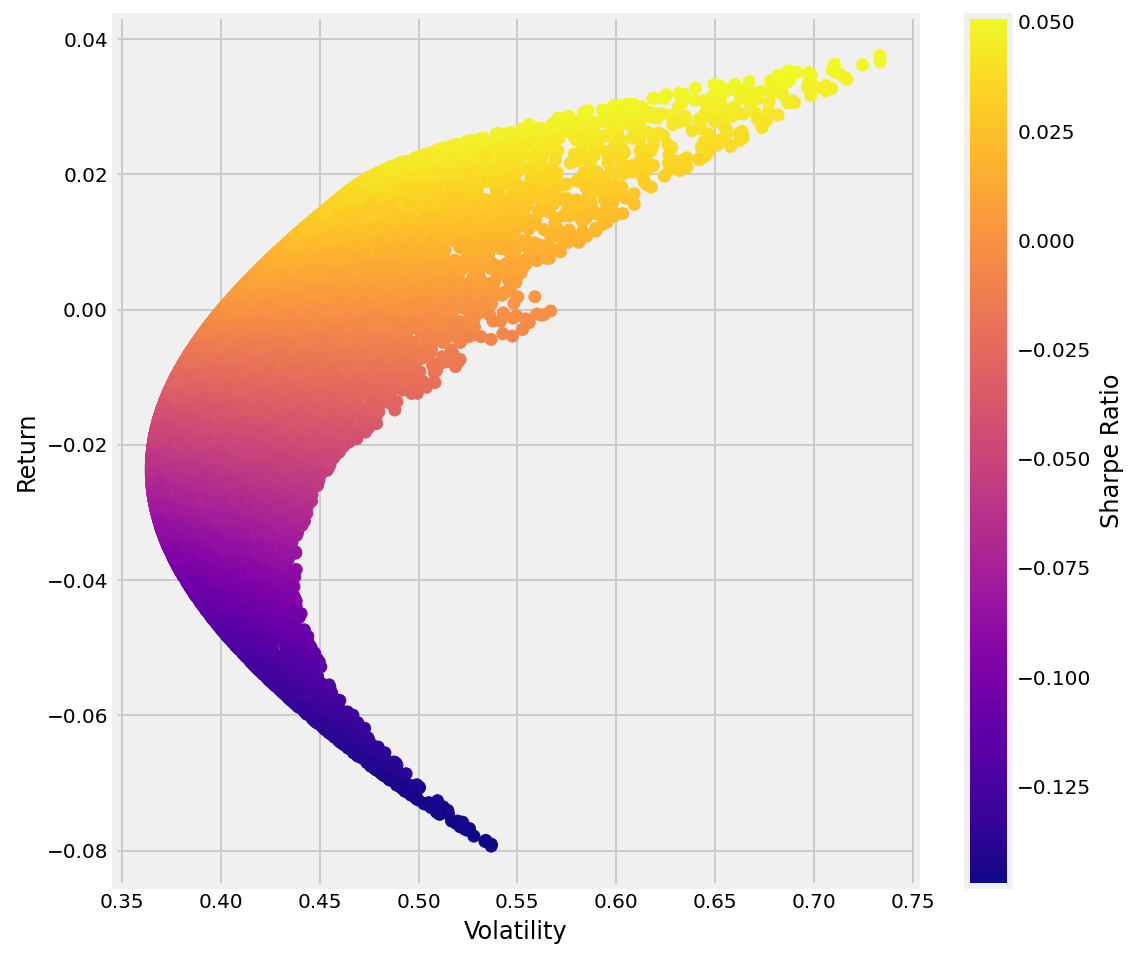

In [37]:
# plot the data
plt.figure(figsize=(8,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [38]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

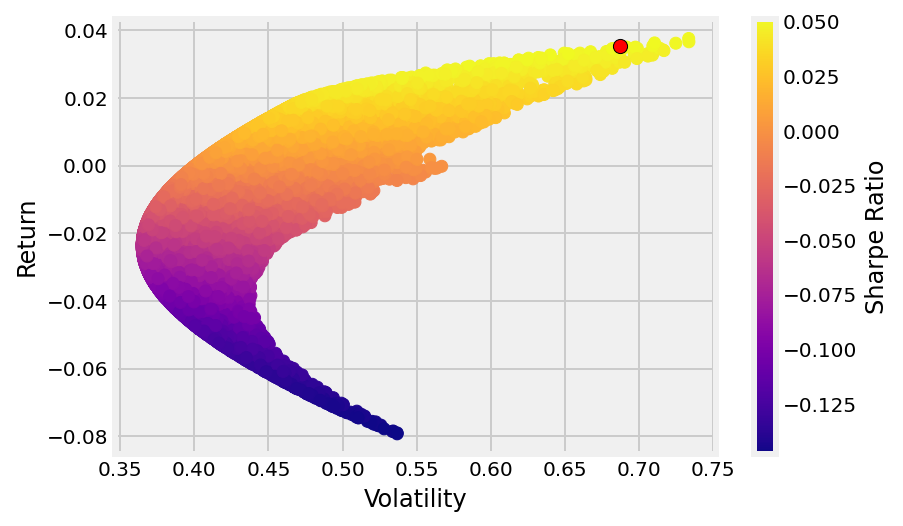

In [39]:
# plot the dataplt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# add a red dot for max_sr_vol & max_sr_ret
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')